# Titanic - Machine Learning from Disaster
Project walkthrough by Punyaphat Sukwan


### The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

##Project overview
### 1) Inspecting Data

### 2) Data Cleaning

### 3) Data Exploration & visualization

### 4) Data Preprocessing

### 5) Model building


Mouting file path on google Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import nescessary libraly


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#1.inspecting data



#### Data Dictionary
|Variable|Definition|Key|
|--------|----------|---|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	Sex	|
|Age|	Age in years|
|sibsp	|# of siblings / spouses aboard the Titanic	|
|parch	|# of parents / children aboard the Titanic	|
|ticket	|Ticket number	|
|fare	|Passenger fare	|
|cabin	|Cabin number	|
|embarked	|Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

#### import all the data for inspection
##### 1. train.csv
##### 2. test.csv

In [ ]:
df_train =pd.read_csv('/content/drive/MyDrive/kaggle_titanic_project/titanic/train.csv')
df_test =pd.read_csv('/content/drive/MyDrive/kaggle_titanic_project/titanic/test.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(df_train.info(),df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [ ]:
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#2. Data cleaning
1. Renaming columns
2.Drop unnecessary columns
3.Dealing with missing values
4.Dropping duplicated
5.format data type

add some column to make the data frame in the same shape and to indicate the source

In [ ]:
df_train['use_for']=1  # 1 is data for train
df_test['use_for']=0 # 0  is data for test
df_test['Survived']=np.NaN # add the Surived as NaN on the df_test

In [ ]:
#check
print(df_train.info(),df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  use_for      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

In [ ]:
#we can join the Data frame  now
df_all = pd.concat([df_train,df_test],axis = 0,ignore_index=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  use_for      1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


## Renaming column

In [ ]:
df_all.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'use_for'],
      dtype='object')

In [ ]:
#renaming into lower case
new_col_names=[]
for name in df_all.columns:
    new_name = name.lower()
    new_col_names.append(new_name)
df_all.columns = new_col_names
df_all.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'use_for'],
      dtype='object')

## Drop unnecessary columns

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     891 non-null    float64
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  use_for      1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


Cabin have the most null values

In [ ]:
#let's explore
df_all.loc[~df_all['cabin'].isna(),::]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,use_for
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,0
1296,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,0
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,0


In [ ]:
df_all.loc[df_all['cabin'].isna(),::]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,use_for
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,0
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [ ]:
#cabin  Nan > 70% to avoid bias
df_all.drop(columns='cabin',inplace=True)

In [ ]:
#passenger id is not use for prediction model


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    float64
 1   pclass    1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
 10  use_for   1309 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


## Dealing with missing values

#### start with 'embarked'

In [ ]:
#inspect
df_all.loc[df_all['embarked'].isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,use_for
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,1


In [ ]:
#check the popularity of embarked group by pclass and sex
df_all.pivot_table( index='pclass',columns='embarked', aggfunc='size', fill_value=0)


embarked,C,Q,S
pclass,,,
1,141,3,177
2,28,7,242
3,101,113,495


In [ ]:
#we can assume that this 2 people embarked at southamptom from popularity check at pclass 1
df_all['embarked'].fillna('S',inplace=True)
#prove with information !!
# https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html  Icard, Miss. Amelie embarked in southampton
#https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html
	#Stone, Mrs. George Nelson (Martha Evelyn) embraked at southampton

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     891 non-null    float64
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  embarked     1309 non-null   object 
 11  use_for      1309 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


####Age

In [ ]:
#inspect
df_all.loc[df_all['age'].isna(),::]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,use_for
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,1
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,1
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,1
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,1
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q,0
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q,0
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,0


In [ ]:
#inspect the age of the other group by ['pclass','embarked','sex']
df_all.groupby(['pclass','embarked','sex'])['age'].median().astype(int).to_frame('med_age')

med_age
pclass embarked sex            
1      C        female       38
                male         39
       Q        female       35
                male         44
       S        female       35
                male         42
2      C        female       23
                male         29
       Q        female       30
                male         59
       S        female       28
                male         29
3      C        female       15
                male         24
       Q        female       22
                male         25
       S        female       22
                male         25

In [ ]:
age_median = df_all.groupby(['pclass','embarked','sex'])['age'].transform('median').astype(int)
age_median

,age
0,25
1,38
2,22
3,35
4,25
...,...
1304,25
1305,38
1306,25
1307,25


In [ ]:
#fill the missing age with the median from the population on  groupby  ['pclass','embarked','sex']
df_all.fillna({'age':age_median},inplace=True)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     891 non-null    float64
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1309 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1309 non-null   float64
 10  embarked     1309 non-null   object 
 11  use_for      1309 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


#### Fare

In [ ]:
df_all.loc[df_all['fare'].isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,use_for


In [ ]:
 #inspect the mean of fare groupby  ['pclass','embarked']
 df_all.groupby(['pclass','embarked'])['fare'].mean().to_frame('avg_fare')

avg_fare
pclass embarked            
1      C         106.845330
       Q          90.000000
       S          72.235825
2      C          23.300593
       Q          11.735114
       S          21.206921
3      C          11.021624
       Q          10.390820
       S          14.435422

In [ ]:
fare_mean = df_all.groupby(['pclass','embarked'])['fare'].transform('mean').round(4)

In [ ]:
#fill missing fare with mean of fare grou by 'pclass','embarked'
df_all.fillna({'fare':fare_mean},inplace=True)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     891 non-null    float64
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1309 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1309 non-null   float64
 10  embarked     1309 non-null   object 
 11  use_for      1309 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


##format data types

In [ ]:
df_all.convert_dtypes()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,use_for
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,<NA>,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.05,S,0
1305,1306,<NA>,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C,0
1306,1307,<NA>,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,S,0
1307,1308,<NA>,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.05,S,0


In [ ]:
#change sex column  to the int values : male = 0 female =1
df_all['sex'] =np.where(df_all['sex']=='male',0,1)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     891 non-null    float64
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   int64  
 5   age          1309 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1309 non-null   float64
 10  embarked     1309 non-null   object 
 11  use_for      1309 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 122.8+ KB


In [ ]:
df_all.describe()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,use_for
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.355997,29.197609,0.498854,0.385027,33.281071,0.680672
std,378.020061,0.486592,0.837836,0.478997,13.281459,1.041658,0.865560,51.741505,0.466394
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [ ]:
# format category data
df_all[['survived','pclass','sex','embarked']] = df_all[['survived','pclass','sex','embarked']].astype('category')


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  1309 non-null   int64   
 1   survived     891 non-null    category
 2   pclass       1309 non-null   category
 3   name         1309 non-null   object  
 4   sex          1309 non-null   category
 5   age          1309 non-null   float64 
 6   sibsp        1309 non-null   int64   
 7   parch        1309 non-null   int64   
 8   ticket       1309 non-null   object  
 9   fare         1309 non-null   float64 
 10  embarked     1309 non-null   category
 11  use_for      1309 non-null   int64   
dtypes: category(4), float64(2), int64(4), object(2)
memory usage: 87.6+ KB


## save cleaned file

In [ ]:
df_train = df_all.loc[df_all['use_for']==1].copy()

In [ ]:
df_test = df_all.loc[df_all['use_for']==0].copy()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  891 non-null    int64   
 1   survived     891 non-null    category
 2   pclass       891 non-null    category
 3   name         891 non-null    object  
 4   sex          891 non-null    category
 5   age          891 non-null    float64 
 6   sibsp        891 non-null    int64   
 7   parch        891 non-null    int64   
 8   ticket       891 non-null    object  
 9   fare         891 non-null    float64 
 10  embarked     891 non-null    category
 11  use_for      891 non-null    int64   
dtypes: category(4), float64(2), int64(4), object(2)
memory usage: 66.6+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 891 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  418 non-null    int64   
 1   survived     0 non-null      category
 2   pclass       418 non-null    category
 3   name         418 non-null    object  
 4   sex          418 non-null    category
 5   age          418 non-null    float64 
 6   sibsp        418 non-null    int64   
 7   parch        418 non-null    int64   
 8   ticket       418 non-null    object  
 9   fare         418 non-null    float64 
 10  embarked     418 non-null    category
 11  use_for      418 non-null    int64   
dtypes: category(4), float64(2), int64(4), object(2)
memory usage: 31.5+ KB


In [ ]:
df_all.to_csv('./drive/MyDrive/kaggle_titanic_project/titanic/data_cleaned_01/all_data_cleaned_01.txt',sep='|')
df_train.to_csv('./drive/MyDrive/kaggle_titanic_project/titanic/data_cleaned_01/train_data_cleaned_01.txt',sep='|')
df_test.to_csv('./drive/MyDrive/kaggle_titanic_project/titanic/data_cleaned_01/test_data_cleaned_01.txt',sep='|')

Cleaning done!

#3.Data Exploration & visualization

In [24]:
df=pd.read_csv('./drive/MyDrive/kaggle_titanic_project/titanic/data_cleaned_01/all_data_cleaned_01.txt',sep='|')
df.drop(columns='Unnamed: 0',inplace=True)

In [25]:
df_train = df.loc[df['use_for']==1].copy()

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    float64
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    int64  
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     891 non-null    object 
 11  use_for      891 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 90.5+ KB


In [27]:
df_train

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,use_for
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,1
887,888,1.0,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,1
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,1,2,W./C. 6607,23.4500,S,1
889,890,1.0,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,1


In [28]:
#add age group column to df
df['age_group'] = pd.cut(x=df['age'], bins=[0, 5,13, 20, 30, 40, 50, 60, 100], labels = ['Infant', 'Child','Teen', '20s', '30s', '40s', '50s', 'Elder'])
df_train['age_group'] = pd.cut(x=df['age'], bins=[0, 5,13, 20, 30, 40, 50, 60, 100], labels = ['Infant', 'Child','Teen', '20s', '30s', '40s', '50s', 'Elder'])

<ipython-input-29-9ae96dd10ce2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df_train, ax=ax[0, 0], palette=palette)
<ipython-input-29-9ae96dd10ce2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=df_train, ax=ax[0, 1], palette=palette)
<ipython-input-29-9ae96dd10ce2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df_train, ax=ax[0, 2], palette=palette)
<ipython-input-29-9ae96dd10ce2>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

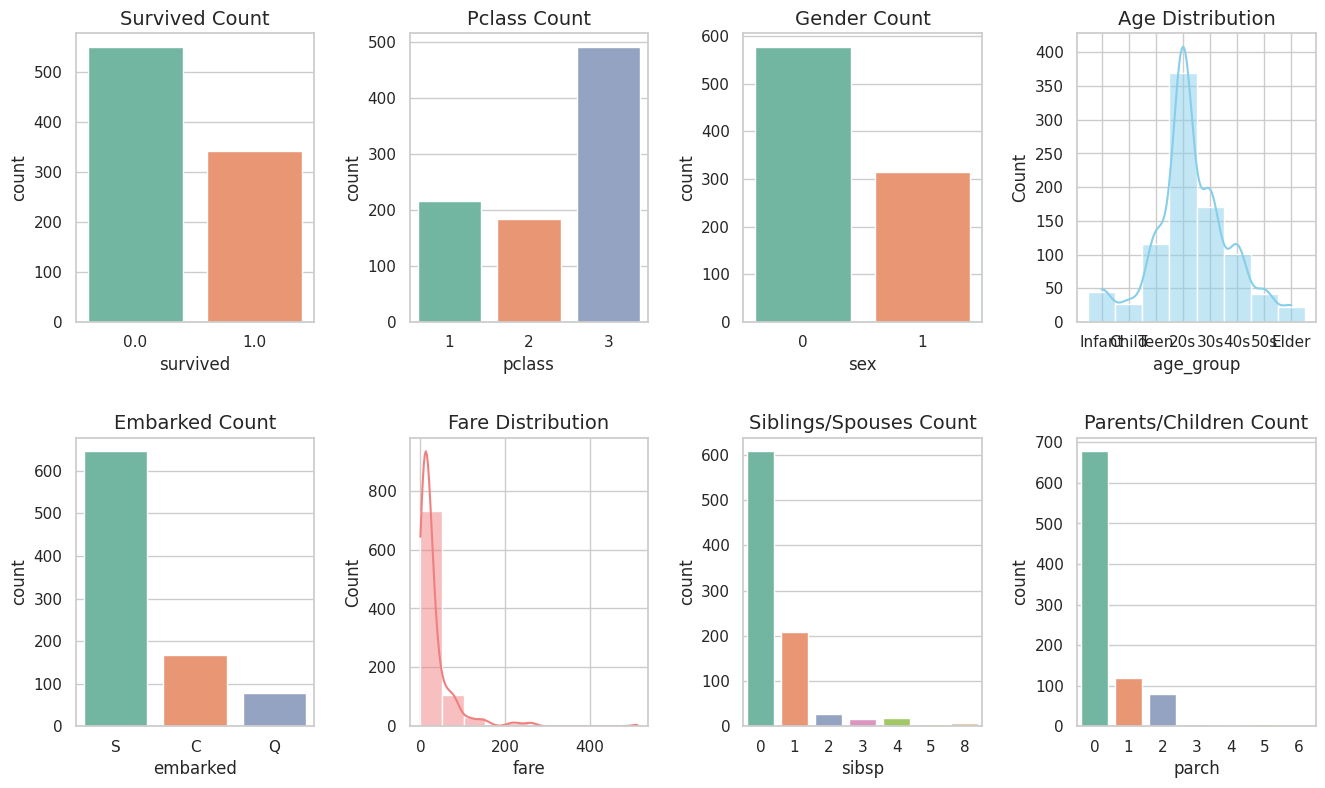

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent style and color palette
sns.set(style="whitegrid")
palette = "Set2"  # A nice, balanced color palette

# Create the figure and axes
fig, ax = plt.subplots(2, 4, figsize=(16, 9))

# Adjust space between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot the charts with color customization and titles
sns.countplot(x='survived', data=df_train, ax=ax[0, 0], palette=palette)
ax[0, 0].set_title("Survived Count", fontsize=14)

sns.countplot(x='pclass', data=df_train, ax=ax[0, 1], palette=palette)
ax[0, 1].set_title("Pclass Count", fontsize=14)

sns.countplot(x='sex', data=df_train, ax=ax[0, 2], palette=palette)
ax[0, 2].set_title("Gender Count", fontsize=14)

sns.histplot(x='age_group', data=df_train, bins=8, ax=ax[0, 3], kde=True, color='skyblue')
ax[0, 3].set_title("Age Distribution", fontsize=14)

sns.countplot(x='embarked', data=df_train, ax=ax[1, 0], palette=palette)
ax[1, 0].set_title("Embarked Count", fontsize=14)

sns.histplot(x='fare', data=df_train, bins=10, ax=ax[1, 1], kde=True, color='lightcoral')
ax[1, 1].set_title("Fare Distribution", fontsize=14)

sns.countplot(x='sibsp', data=df_train, ax=ax[1, 2], palette=palette)
ax[1, 2].set_title("Siblings/Spouses Count", fontsize=14)

sns.countplot(x='parch', data=df_train, ax=ax[1, 3], palette=palette)
ax[1, 3].set_title("Parents/Children Count", fontsize=14)

# Show the plots
plt.show()


<ipython-input-30-7ce9ee38c40a>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='embarked', y='fare', data=df, ax=ax[1, 2], palette='muted',showfliers=False)
<ipython-input-30-7ce9ee38c40a>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='pclass', y='survived', data=df, ax=ax[1, 3], palette=palette_pclass)


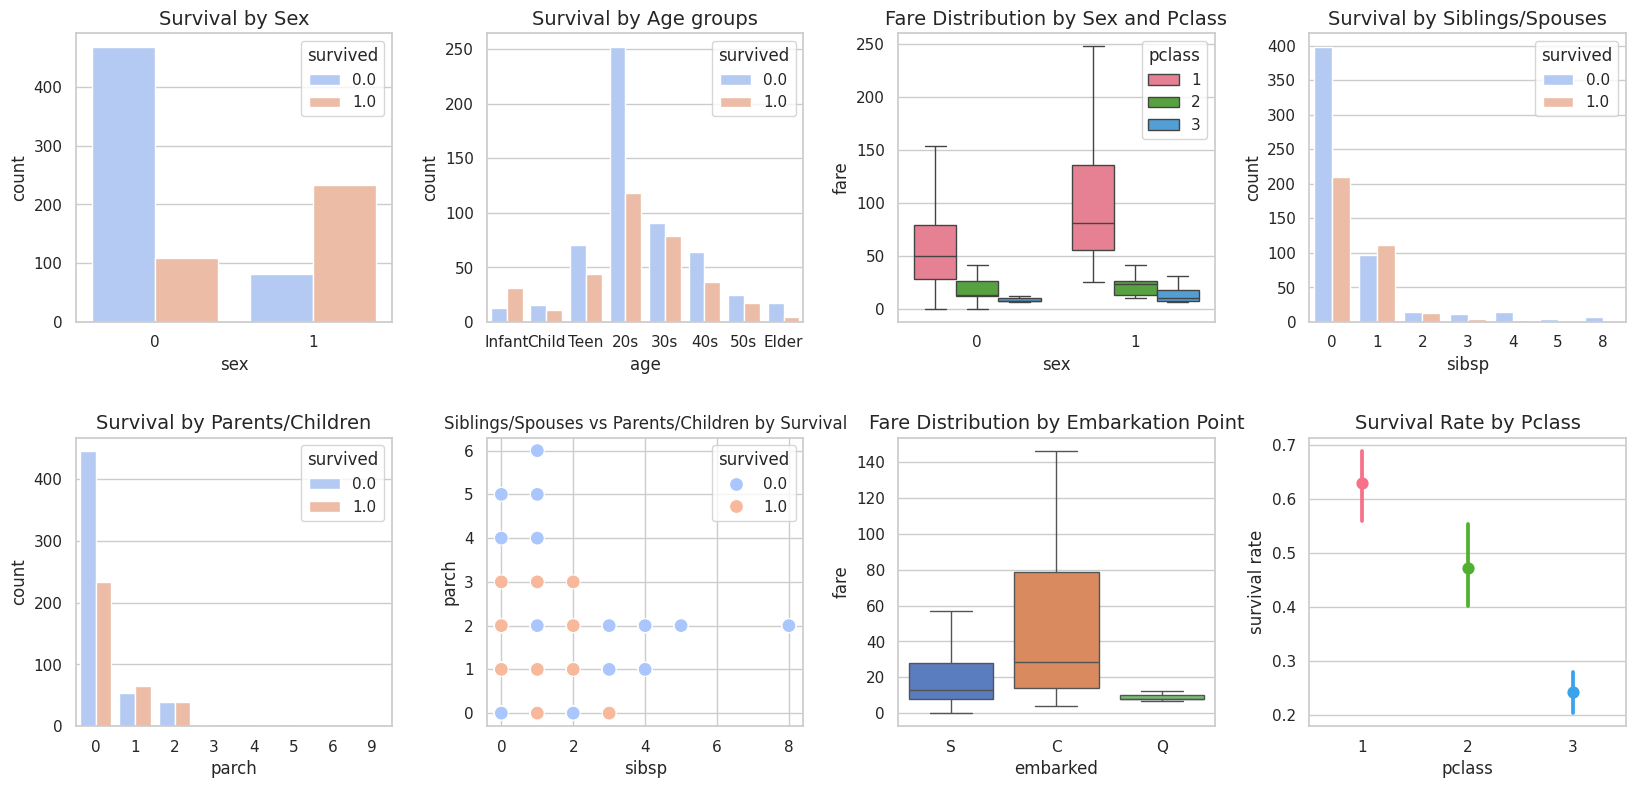

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent style and color palette
sns.set(style="whitegrid")
palette_survived = sns.color_palette("coolwarm", 2)
palette_pclass = sns.color_palette("husl", 3)

# Create the figure and axes
fig, ax = plt.subplots(2, 4, figsize=(20,9 ))

# Adjust space between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot the charts with improvements
sns.countplot(x='sex', data=df, hue='survived', palette=palette_survived, ax=ax[0, 0])
ax[0, 0].set_title("Survival by Sex", fontsize=14)
ax[0, 0].set_xlabel("sex", fontsize=12)
ax[0, 0].set_ylabel("count", fontsize=12)

sns.countplot(x='age_group', data=df, hue='survived', palette=palette_survived, ax=ax[0, 1])
ax[0, 1].set_title("Survival by Age groups", fontsize=14)
ax[0, 1].set_xlabel("age", fontsize=12)

sns.boxplot(x='sex', y='fare', data=df, hue='pclass', palette=palette_pclass, ax=ax[0, 2],showfliers=False)
ax[0, 2].set_title("Fare Distribution by Sex and Pclass", fontsize=14)
ax[0, 2].set_xlabel("sex", fontsize=12)
ax[0, 2].set_ylabel("fare", fontsize=12)

sns.countplot(x='sibsp', data=df, hue='survived', palette=palette_survived, ax=ax[0, 3])
ax[0, 3].set_title("Survival by Siblings/Spouses", fontsize=14)
ax[0, 3].set_xlabel("sibsp", fontsize=12)

sns.countplot(x='parch', data=df, hue='survived', palette=palette_survived, ax=ax[1, 0])
ax[1, 0].set_title("Survival by Parents/Children", fontsize=14)
ax[1, 0].set_xlabel("parch", fontsize=12)

sns.scatterplot(x='sibsp', y='parch', data=df, hue='survived', palette=palette_survived, ax=ax[1, 1], s=100)
ax[1, 1].set_title("Siblings/Spouses vs Parents/Children by Survival", fontsize=12)
ax[1, 1].set_xlabel("sibsp", fontsize=12)
ax[1, 1].set_ylabel("parch", fontsize=12)

sns.boxplot(x='embarked', y='fare', data=df, ax=ax[1, 2], palette='muted',showfliers=False)
ax[1, 2].set_title("Fare Distribution by Embarkation Point", fontsize=14)
ax[1, 2].set_xlabel("embarked", fontsize=12)
ax[1, 2].set_ylabel("fare", fontsize=12)

sns.pointplot(x='pclass', y='survived', data=df, ax=ax[1, 3], palette=palette_pclass)
ax[1, 3].set_title("Survival Rate by Pclass", fontsize=14)
ax[1, 3].set_xlabel("pclass", fontsize=12)
ax[1, 3].set_ylabel("survival rate", fontsize=12)

# Show the plot
plt.show()


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  891 non-null    int64   
 1   survived     891 non-null    float64 
 2   pclass       891 non-null    int64   
 3   name         891 non-null    object  
 4   sex          891 non-null    int64   
 5   age          891 non-null    float64 
 6   sibsp        891 non-null    int64   
 7   parch        891 non-null    int64   
 8   ticket       891 non-null    object  
 9   fare         891 non-null    float64 
 10  embarked     891 non-null    object  
 11  use_for      891 non-null    int64   
 12  age_group    891 non-null    category
dtypes: category(1), float64(3), int64(6), object(3)
memory usage: 91.7+ KB


#4.Data preprocessing

In [94]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Copy the dataframe to avoid modifying the original
df_clean = df.copy()

# Separate data for training/testing and for prediction
df_train_test = df_clean[df_clean['use_for'] == 1].copy()  # Data where 'use_for' = 1
df_unseen = df_clean[df_clean['use_for'] == 0].copy()     # Data where 'use_for' = 0

# Encode 'age_group' in training/testing and prediction data
age_group_order = ['Infant', 'Child', 'Teen', '20s', '30s', '40s', '50s', 'Elder']
df_train_test['age_group'] = pd.Categorical(df_train_test['age_group'], categories=age_group_order, ordered=True).codes
df_unseen['age_group'] = pd.Categorical(df_unseen['age_group'], categories=age_group_order, ordered=True).codes

# One-hot encode 'embarked'
df_train_test = pd.get_dummies(df_train_test, columns=['embarked'], drop_first=True)
df_unseen = pd.get_dummies(df_unseen, columns=['embarked'], drop_first=True)

# Ensure both training/testing and prediction sets have the same columns after one-hot encoding
X_train_test = df_train_test.drop(columns=['survived', 'name', 'ticket', 'passengerid', 'use_for'])
X_unseen = df_unseen.drop(columns=['survived', 'name', 'ticket', 'use_for'])

# Align columns in X_unseen with X_train_test
X_unseen = X_unseen.reindex(columns=X_train_test.columns, fill_value=0)

# Define target variable
y_train_test = df_train_test['survived']

# Split the data where 'use_for' = 1 into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42)

# Check and handle missing values in y_train and y_test
print("Before handling missing values:")
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_test:", y_test.isnull().sum())
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Before handling missing values:
Missing values in y_train: 0
Missing values in y_test: 0
Missing values in X_train: 0
Missing values in X_test: 0
X_train shape: (668, 9)
y_train shape: (668,)
X_test shape: (223, 9)
y_test shape: (223,)


#5.model building

In [95]:
df_train_test

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,use_for,age_group,embarked_Q,embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1,3,False,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,4,False,False
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1,3,False,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,4,False,True
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1,4,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,1,3,False,True
887,888,1.0,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,1,2,False,True
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,1,2,W./C. 6607,23.4500,1,3,False,True
889,890,1.0,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1,3,False,False


In [96]:
df_unseen

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,use_for,age_group,embarked_Q,embarked_S
891,892,NaN,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,4,True,False
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,5,False,True
893,894,NaN,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,7,True,False
894,895,NaN,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,3,False,True
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,3,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,25.0,0,0,A.5. 3236,8.0500,0,3,False,True
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,0,4,False,False
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,4,False,True
1307,1308,NaN,3,"Ware, Mr. Frederick",0,25.0,0,0,359309,8.0500,0,3,False,True


In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report


#### Naive Bayes

In [99]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred)

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:")
print(nb_report)


Naive Bayes Accuracy: 0.7713004484304933
Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81       134
         1.0       0.70      0.74      0.72        89

    accuracy                           0.77       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.77      0.77      0.77       223



###### Predict on the unseen data

In [108]:

# Predict on the unseen data (X_unseen)
nb_pred_ans = nb_model.predict(X_unseen)


# Create a DataFrame with predictions and passenger IDs
results_df = pd.DataFrame({
    'PassengerId': df_unseen['passengerid'],
    'Survived': nb_pred_ans.astype(int)
})

# Save the DataFrame to a CSV file
results_df.to_csv('./drive/MyDrive/kaggle_titanic_project/naive_bayes_predictions4.csv', index=False)

### Logistic Regression

In [103]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(lr_report)


Logistic Regression Accuracy: 0.8161434977578476
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       134
         1.0       0.78      0.75      0.77        89

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



###### Predict on the unseen data

In [106]:
# Predict on the unseen data (X_unseen)
lr_pred_ans = lr_model.predict(X_unseen)


# Create a DataFrame with predictions and passenger IDs
results_df = pd.DataFrame({
    'PassengerId': df_unseen['passengerid'],
    'Survived': lr_pred_ans.astype(int)
})

# Save the DataFrame to a CSV file
results_df.to_csv('./drive/MyDrive/kaggle_titanic_project/Logistic_ Regression_predictions.csv', index=False)

Logistic Regression on unseen data: 0.9330143540669856
Logistic Regression Report on unseen data:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       266
           1       0.89      0.93      0.91       152

    accuracy                           0.93       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418



###Decision Tree

In [110]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(dt_report)


Decision Tree Accuracy: 0.7488789237668162
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79       134
         1.0       0.69      0.66      0.68        89

    accuracy                           0.75       223
   macro avg       0.74      0.73      0.74       223
weighted avg       0.75      0.75      0.75       223



###### Predict on the unseen data

In [113]:
# Predict on the unseen data (X_unseen)
df_pred_ans = dt_model.predict(X_unseen)


# Create a DataFrame with predictions and passenger IDs
results_df = pd.DataFrame({
    'PassengerId': df_unseen['passengerid'],
    'Survived': df_pred_ans.astype(int)
})

# Save the DataFrame to a CSV file
results_df.to_csv('./drive/MyDrive/kaggle_titanic_project/Decision_ Tree_predictions.csv', index=False)

### K-Nearest Neighbor

In [114]:
# K-Nearest Neighbor
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions
knn_pred = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)

print("K-Nearest Neighbor Accuracy:", knn_accuracy)
print("K-Nearest Neighbor Classification Report:")
print(knn_report)


K-Nearest Neighbor Accuracy: 0.7040358744394619
K-Nearest Neighbor Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       134
         1.0       0.64      0.58      0.61        89

    accuracy                           0.70       223
   macro avg       0.69      0.68      0.69       223
weighted avg       0.70      0.70      0.70       223



###### Predict on the unseen data

In [116]:
# Predict on the unseen data (X_unseen)
df_pred_ans = knn_model.predict(X_unseen)


# Create a DataFrame with predictions and passenger IDs
results_df = pd.DataFrame({
    'PassengerId': df_unseen['passengerid'],
    'Survived': df_pred_ans.astype(int)
})

# Save the DataFrame to a CSV file
results_df.to_csv('./drive/MyDrive/kaggle_titanic_project/K_Nearest _Neighbor_predictions.csv', index=False)

### Support Vector Classifier

In [117]:
# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Make predictions
svc_pred = svc_model.predict(X_test)

# Evaluate the model
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_report = classification_report(y_test, svc_pred)

print("Support Vector Classifier Accuracy:", svc_accuracy)
print("Support Vector Classifier Classification Report:")
print(svc_report)


Support Vector Classifier Accuracy: 0.6591928251121076
Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.93      0.77       134
         1.0       0.71      0.25      0.37        89

    accuracy                           0.66       223
   macro avg       0.68      0.59      0.57       223
weighted avg       0.67      0.66      0.61       223



###### Predict on the unseen data

In [118]:
# Predict on the unseen data (X_unseen)
df_pred_ans =  svc_model.predict(X_unseen)


# Create a DataFrame with predictions and passenger IDs
results_df = pd.DataFrame({
    'PassengerId': df_unseen['passengerid'],
    'Survived': df_pred_ans.astype(int)
})

# Save the DataFrame to a CSV file
results_df.to_csv('./drive/MyDrive/kaggle_titanic_project/Support Vector_predictions.csv', index=False)

### XGBoost

In [121]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:")
print(xgb_report)
#predict on the un predict data set

XGBoost Accuracy: 0.820627802690583
XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       134
         1.0       0.77      0.79      0.78        89

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:15:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


###### Predict on the unseen data

In [122]:
# Predict on the unseen data (X_unseen)
df_pred_ans =  xgb_model.predict(X_unseen)


# Create a DataFrame with predictions and passenger IDs
results_df = pd.DataFrame({
    'PassengerId': df_unseen['passengerid'],
    'Survived': df_pred_ans.astype(int)
})

# Save the DataFrame to a CSV file
results_df.to_csv('./drive/MyDrive/kaggle_titanic_project/XGBoost__predictions.csv', index=False)

### Random Forest

In [123]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(rf_report)


Random Forest Accuracy: 0.8071748878923767
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       134
         1.0       0.77      0.73      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



###### Predict on the unseen data

In [124]:
# Predict on the unseen data (X_unseen)
df_pred_ans = rf_model.predict(X_unseen)


# Create a DataFrame with predictions and passenger IDs
results_df = pd.DataFrame({
    'PassengerId': df_unseen['passengerid'],
    'Survived': df_pred_ans.astype(int)
})

# Save the DataFrame to a CSV file
results_df.to_csv('./drive/MyDrive/kaggle_titanic_project/Random Forest__predictions.csv', index=False)

#

#6.Results

In [129]:
model_accuracies = {
    'Naive Bayes': nb_accuracy,
    'Logistic Regression': lr_accuracy,
    'Decision Tree': dt_accuracy,
    'K-Nearest Neighbor': knn_accuracy,
    'Random Forest': rf_accuracy,
    'Support Vector Classifier': svc_accuracy,
    'XGBoost': xgb_accuracy,

}

# Display accuracies
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")


Naive Bayes: 0.7713
Logistic Regression: 0.8161
Decision Tree: 0.7489
K-Nearest Neighbor: 0.7040
Random Forest: 0.8072
Support Vector Classifier: 0.6592
XGBoost: 0.8206


### Summary model accuracy

                       Model  Accuracy
0                Naive Bayes  0.771300
1        Logistic Regression  0.816143
2              Decision Tree  0.748879
3         K-Nearest Neighbor  0.704036
4              Random Forest  0.807175
5  Support Vector Classifier  0.659193
6                    XGBoost  0.820628


<ipython-input-130-bd3a11edb39b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_accuracies, palette='viridis')


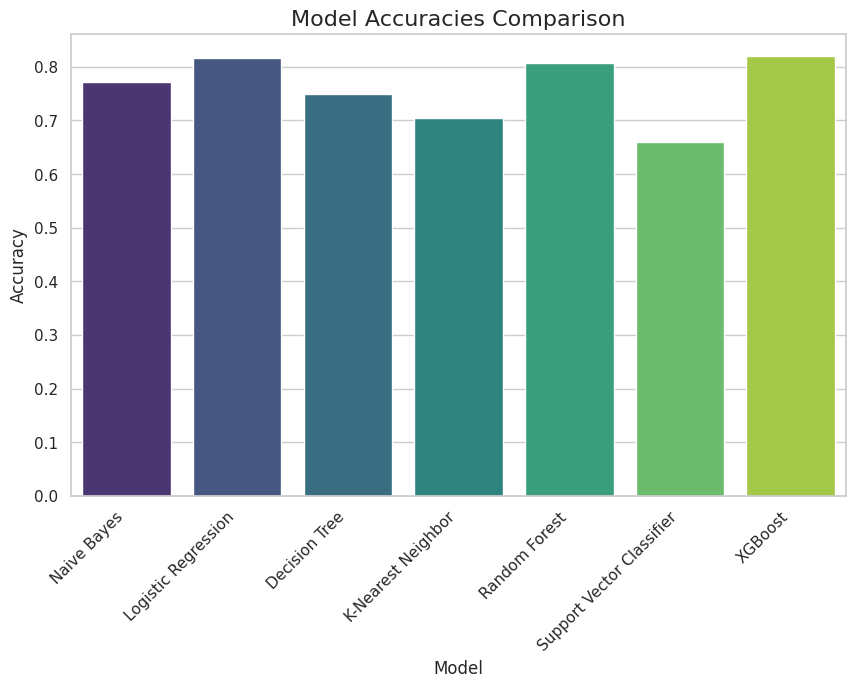

In [130]:
import pandas as pd

# Create a dataframe from the dictionary
df_accuracies = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Display the table
print(df_accuracies)
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the dictionary into a dataframe for easy plotting
df_accuracies = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_accuracies, palette='viridis')

# Add labels and title
plt.title('Model Accuracies Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


# Additional: neural network with tensorflow&keras

In [131]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Assuming you have preprocessed data as X_train, X_test, y_train, y_test

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variable to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f"Neural Network Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5708 - loss: 0.7430 - val_accuracy: 0.7761 - val_loss: 0.5863
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6999 - loss: 0.5855 - val_accuracy: 0.7985 - val_loss: 0.5282
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6898 - loss: 0.5896 - val_accuracy: 0.8060 - val_loss: 0.4876
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7499 - loss: 0.5317 - val_accuracy: 0.7985 - val_loss: 0.4600
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7507 - loss: 0.5187 - val_accuracy: 0.8060 - val_loss: 0.4451
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7925 - loss: 0.5002 - val_accuracy: 0.8284 - val_loss: 0.4361
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7931 - loss: 0.4539 - val_accuracy: 0.8209 - val_loss: 0.4259
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7491 - loss: 0.5376 - val_accuracy: 0.8209 - v

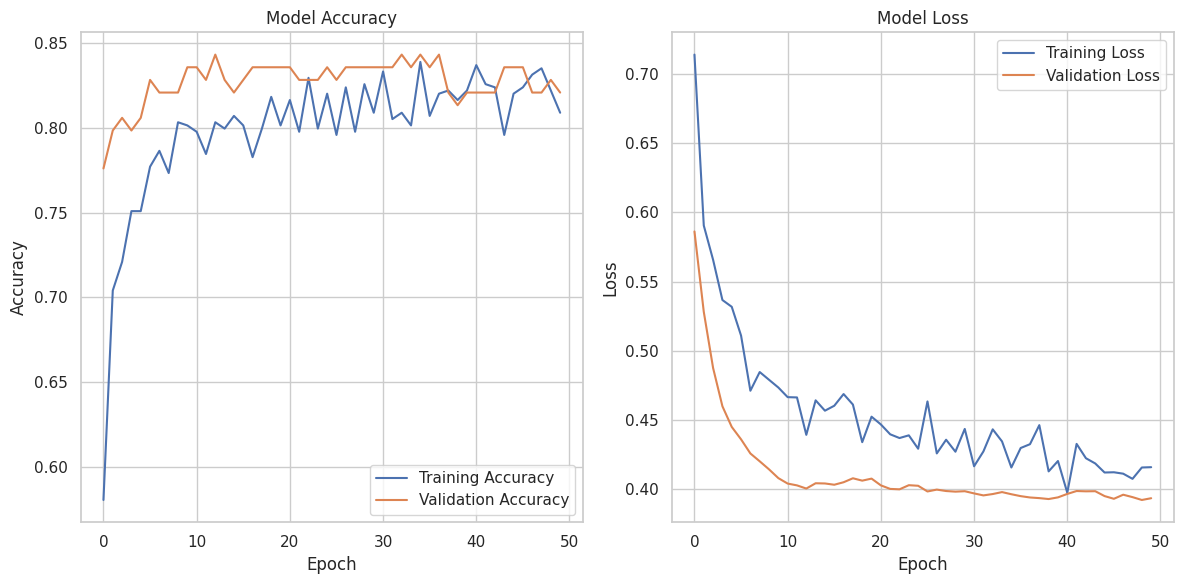

In [132]:
# Plot accuracy and loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [135]:
# Make predictions on the unseen data
nn_predictions = model.predict(X_unseen)
nn_predictions = np.argmax(nn_predictions, axis=1)  # Convert one-hot encoded predictions to class labels

# Create a DataFrame with passenger IDs and predictions
results_df = pd.DataFrame({
    'passengerid': df_unseen['passengerid'],
    'survived_predict': nn_predictions
})

# Save the DataFrame to a CSV file
results_df.to_csv('./drive/MyDrive/kaggle_titanic_project/nn_predictions.csv' ,index=False)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
